In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

print("✅ Libraries imported!")

C:\Users\aounm\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


✅ Libraries imported!


In [3]:
# Create data generators
train_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_gen = ImageDataGenerator(rescale=1./255)

# Load images
train_data = train_gen.flow_from_directory(
    'data/melanoma_cancer_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_data = val_gen.flow_from_directory(
    'data/melanoma_cancer_dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

print("✅ Data loaded!")

Found 8165 images belonging to 2 classes.
Found 2663 images belonging to 2 classes.
✅ Data loaded!


In [4]:
# Load MobileNetV2 (already trained on millions of images)
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze it (don't retrain it)
base_model.trainable = False

print("✅ MobileNetV2 loaded!")

✅ MobileNetV2 loaded!


In [5]:
# Build transfer learning model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()
print("✅ Model ready!")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

✅ Model ready!


In [6]:
print("Training... wait 10-15 minutes")

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

print("✅ Training done!")

Training... wait 10-15 minutes
Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.8540 - loss: 0.3341 - val_accuracy: 0.8832 - val_loss: 0.2662
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.8905 - loss: 0.2655 - val_accuracy: 0.8967 - val_loss: 0.2445
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.8974 - loss: 0.2490 - val_accuracy: 0.9012 - val_loss: 0.2337
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.9023 - loss: 0.2350 - val_accuracy: 0.9061 - val_loss: 0.2278
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 255s 997ms/step - accuracy: 0.9096 - loss: 0.2236 - val_accuracy: 0.9103 - val_loss: 0.2220
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 255s 995ms/step - accuracy: 0.9137 - loss: 0.2221 - val_accuracy: 0.9148 - val_loss: 0.2137
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9154 - loss: 0.2098 - val_accuracy: 0.9170 - val_loss: 0.2159
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accur

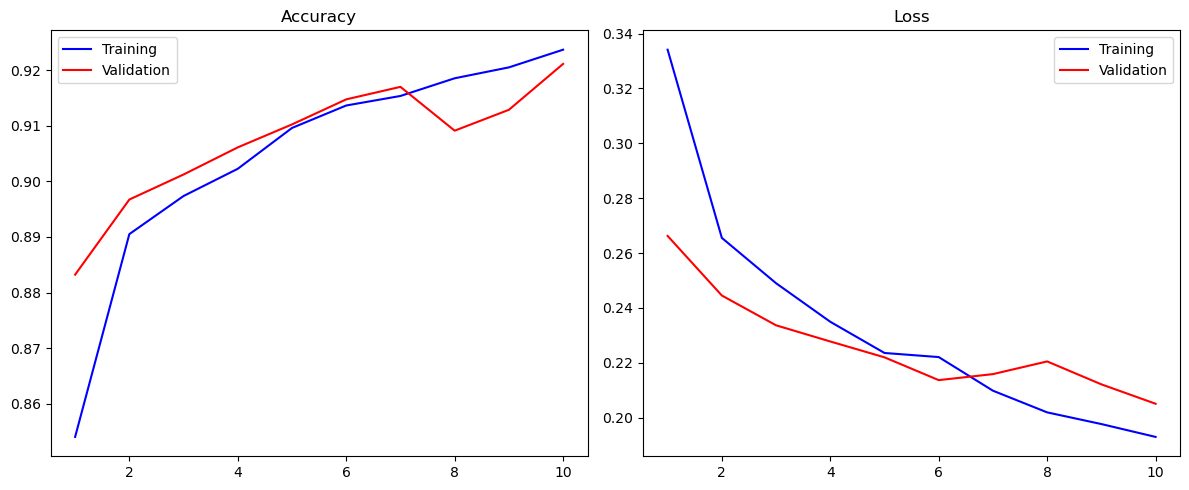

Week 2 Validation Accuracy: 90.76%
Week 3 Validation Accuracy: 92.11%

Improvement: 1.35%


In [7]:
# Plot training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training')
plt.plot(epochs, val_loss, 'r', label='Validation')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Week 2 Validation Accuracy: 90.76%")
print(f"Week 3 Validation Accuracy: {val_acc[-1]*100:.2f}%")
print(f"\nImprovement: {(val_acc[-1] - 0.9076)*100:.2f}%")

In [8]:
# Load test data
test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    'data/melanoma_cancer_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluate
test_loss, test_acc = model.evaluate(test_data)

print(f"\nWeek 2 Test Accuracy: 90.50%")
print(f"Week 3 Test Accuracy: {test_acc*100:.2f}%")
print(f"Improvement: {(test_acc - 0.9050)*100:.2f}%")

Found 1000 images belonging to 2 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 671ms/step - accuracy: 0.9130 - loss: 0.2290

Week 2 Test Accuracy: 90.50%
Week 3 Test Accuracy: 91.30%
Improvement: 0.80%


32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 690ms/step


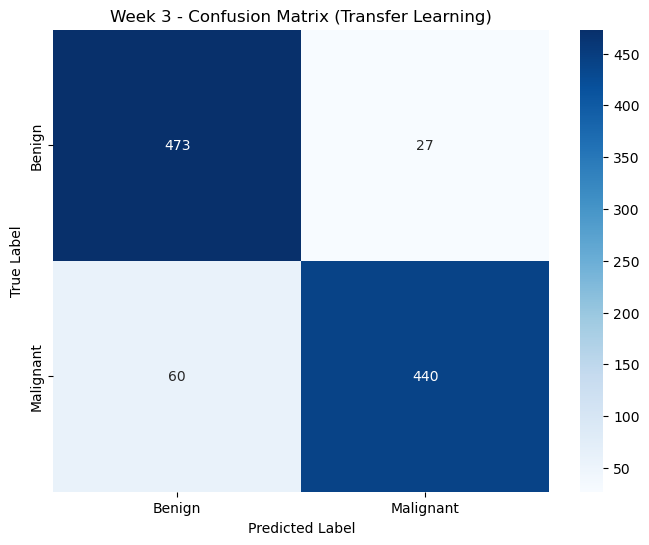


Week 3 Classification Report:
              precision    recall  f1-score   support

      Benign       0.89      0.95      0.92       500
   Malignant       0.94      0.88      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Get predictions
predictions = model.predict(test_data)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = test_data.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Week 3 - Confusion Matrix (Transfer Learning)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks([0.5, 1.5], ['Benign', 'Malignant'])
plt.yticks([0.5, 1.5], ['Benign', 'Malignant'])
plt.show()

# Print report
print("\nWeek 3 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

In [10]:
# Save model
model.save('skin_cancer_mobilenet.h5')
print("✅ Model saved as 'skin_cancer_mobilenet.h5'")

# Save training history
import pickle

with open('mobilenet_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

print("✅ Training history saved!")

✅ Model saved as 'skin_cancer_mobilenet.h5'
✅ Training history saved!
